rBergomi: generating surface for dissertation
==

$$S_t = \mathcal{E} \left\{ \int_0^t \sqrt{ V_u } \ \mathrm{d} \ (\rho W^1_u + \bar{\rho} W^2_u) \right\}, \quad V_t = \xi \ \mathcal{E} \left\{ \eta \sqrt{2\alpha + 1} \int_0^t (t - u)^\alpha \mathrm{d}W^1_u \right\},$$

In [1]:
import os
os.chdir('/Users/ryanmccrickerd/desktop/rbergomi/rbergomi')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# import matplotlib.mlab as mlab
from rbergomi import rBergomi
# from surface import Surface
from routines import generate_surface
% matplotlib inline

Record maturities and granularities here which give 312 steps for each

In [ ]:
n_dict = {'1D':624,
          '1W':104,
          '1M':24,
          '3M':8,
          '6M':4,
          '1Y':2,
          '2Y':1}
n_dict

**Specify tenor and paths here**

In [ ]:
tenor = '2Y'
N = 400000

In [ ]:
n = n_dict[tenor]
n

In [ ]:
T = 2./n
T

In [ ]:
rbergomi = rBergomi(n = n, N = N, T = T, a = -0.43, AS = True)

In [ ]:
rbergomi.T

In [ ]:
k_max = 0.05
num_points = 21
log_strikes = np.linspace(-k_max, k_max, num_points)[np.newaxis,:]
log_strikes

In [ ]:
kwargs = {'xi':0.235**2, 'eta':1.9, 'rho':-0.}

In [ ]:
np.random.seed(0)

In [ ]:
IV = generate_surface(rbergomi, log_strikes, **kwargs)

This section should take the same amount of time for each. N should be scaled accordingly.

In [ ]:
k = log_strikes

plot, axes = plt.subplots()

axes.plot(k[0,:], IV[0,:], 'r')

# 1SD bounds - only correct when not using AV
# axes.plot(k[M,:], IV[M,:,0], 'k--', linewidth = 0.5) # Lower bound
# axes.plot(k[M,:], IV[M,:,2], 'k--', linewidth = 0.5) # Upper bound

# axes.plot(k[M,:], MV[M,:], 'go', fillstyle = 'none', ms = 4, mew = 1)

axes.set_xlabel(r'$k$', fontsize = 14)
axes.set_ylabel(r'$IV(k,\tau)$', fontsize = 14)
axes.set_title(r'$T=$' + tenor, fontsize = 14)
#axes.legend([r'$\mathsf{Standard}$', r'$\mathsf{Timer \ Control}$', r'$\mathsf{S \ Control}$'])
# plt.xlim([-0.05,0.05])
# plt.ylim([0.14,0.30])

plt.grid(True)

In [ ]:
col_dict = {'1D':'B',
            '1W':'C',
            '1M':'D',
            '3M':'E',
            '6M':'F',
            '1Y':'G',
            '2Y':'H'}
col_dict

In [ ]:
import xlwings as xw
install_path = '/Users/ryanmccrickerd/desktop'
file_path = install_path + '/rbergomi/data/surface_data.xlsx'
# Instantiate xlwings object
wb = xw.Book(file_path)
sht = wb.sheets['Sheet1']

**The following will write to surface_data.xlsx file**

In [ ]:
# # Paste implied vols
# sht.range(col_dict[tenor] + '1').value = T
# sht.range(col_dict[tenor] + '2').value = 100 * np.flipud(np.transpose(IV))
# wb.save()

In [ ]:
# Copy implied surface
log_strikes = np.array(sht.range('A2:A22').value)
maturities = np.array(sht.range('B1:G1').value)
surface = np.transpose(np.array(sht.range('B2:G22').value))

Demonstrate this neatly

In [ ]:
import pandas as pd
pd.DataFrame(surface, index = maturities, columns = log_strikes)

Now plot this

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

X = log_strikes[np.newaxis,:]
Y = maturities[:,np.newaxis]
X, Y = np.meshgrid(X, Y)
Z = surface

# Plot the surface.
surf = ax.plot_wireframe(X, Y, Z, cmap = cm.coolwarm, linewidth = 0.1, antialiased = False)

plt.show()

This looks shite...

In [3]:
from surface import Surface
surface = Surface('surface', 'base', close = False)

In [4]:
surface.surface

,5P,10P,15P,20P,25P,30P,35P,40P,45P,ATM,45C,40C,35C,30C,25C,20C,15C,10C,5C
1D,0.324548,0.295867,0.278527,0.265714,0.255337,0.246528,0.238823,0.231842,0.225386,0.219606,0.213549,0.207946,0.202434,0.196966,0.191421,0.185635,0.179379,0.172302,0.163241
1W,0.332202,0.299343,0.279773,0.265418,0.253893,0.244151,0.235702,0.228103,0.221110,0.215340,0.208425,0.202493,0.196720,0.191033,0.185326,0.179481,0.173282,0.166436,0.158147
1M,0.335236,0.299439,0.278203,0.262749,0.250429,0.240083,0.231134,0.223156,0.215858,0.210680,0.202695,0.196624,0.190776,0.185066,0.179402,0.173699,0.167810,0.161528,0.154338
3M,0.333202,0.296052,0.274017,0.258037,0.245360,0.234788,0.225659,0.217556,0.210161,0.206085,0.196941,0.190900,0.185136,0.179553,0.174093,0.168675,0.163233,0.157642,0.151672
6M,0.328794,0.291462,0.269242,0.253180,0.240494,0.229950,0.220844,0.212772,0.205431,0.202469,0.192372,0.186444,0.180820,0.175414,0.170183,0.165061,0.160018,0.155004,0.150002
1Y,0.321039,0.284210,0.262220,0.246376,0.233928,0.223565,0.214633,0.206708,0.199534,0.198101,0.186844,0.181132,0.175735,0.170606,0.165700,0.160971,0.156435,0.152116,0.148262


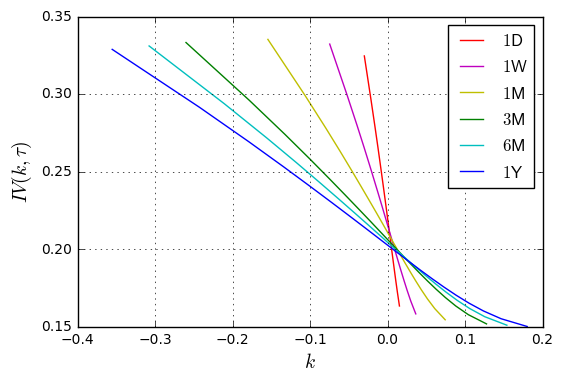

In [5]:
k = np.array(surface._log_strike_surface())
MV = np.array(surface.surface)

plot, axes = plt.subplots()

axes.plot(k[0,:], MV[0,:], 'r')
axes.plot(k[1,:], MV[1,:], 'm')
axes.plot(k[2,:], MV[2,:], 'y')
axes.plot(k[3,:], MV[3,:], 'g')
axes.plot(0.5*(k[3,:]+k[4,:]), 0.5*(MV[3,:]+MV[4,:]), 'c')
axes.plot(k[4,:], MV[4,:], 'b')

axes.set_xlabel(r'$k$', fontsize = 14)
axes.set_ylabel(r'$IV(k,\tau)$', fontsize = 14)
# axes.set_title(r'$T=$' + surface._tenors[M], fontsize = 14)
axes.legend([r'$\mathsf{1D}$',
             r'$\mathsf{1W}$',
             r'$\mathsf{1M}$',
             r'$\mathsf{3M}$',
             r'$\mathsf{6M}$',
             r'$\mathsf{1Y}$'])

plt.grid(True)

This is much better. do this for rho = 0 and rho = -0.9, with 1D to 1Y maturities. :)

Obtain the smiles from the other open notebook.